In [23]:
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork
from TemporalStability import FlowIntegralClustering
import numpy as np
import time
import matplotlib.pyplot as plt

# Example of temporal network with asymmetric temporal paths (Fig. 2)


In [24]:
inter_tau = 1
activ_tau = 1
t_start = 0
n_groups = 3
n_per_group = 9
individuals = []


m1=0.95
p1=0.95
deltat1 =120
deltat2=40

t_end = 3*deltat1+2*deltat2




def make_step_block_probs(deltat1, deltat2, m1=1, p1=1):
    """ Returns a function that generate the block probability matrix as a function of time.
    
        `deltat1` is the length of the within step
    
        `deltat2` is the length of the echanging step
        
        `m1` is the prob of self-interaction (during deltat1)
        
        `p1` is the prob of cross-interaction (during deltat2)
    """


    def block_mod_func(t):
        
        m2 = (1-m1)/2
        p2 = (1-p1)
        
        ex12 = np.array([[p2,p1,0],
                         [p1,p2,0],
                         [0,0,1]])
        ex23 = np.array([[1,0,0],
                         [0,p2,p1],
                         [0,p1,p2]])
        ex13 = np.array([[p2,0,p1],
                         [0, 1, 0],
                         [p1,0,p2]])
    
        I = np.array([[m1,m2,m2],
                      [m2,m1,m2],
                      [m2,m2,m1]])
        if t>=0 and  t < deltat1:
            return ex12
        elif t>=deltat1 and t<deltat1+deltat2:
            return I
        elif t>=deltat1+deltat2 and t < 2*deltat1+deltat2:
            return ex23
        elif t>= 2*deltat1+deltat2 and t < 2*(deltat1+deltat2):
            return I
        elif t>= 2*(deltat1+deltat2) and t < 2*(deltat1+deltat2)+deltat1:
            return ex13
        else:
            print('Warning : t must be >=0 and <= 3*deltat1+2*deltat2' +\
                  't is ', t)
            return I
        
    return block_mod_func
 


block_prob_mod_func = make_step_block_probs(deltat1,deltat2,m1,p1)


In [25]:
# create agents for the simlation
for g in range(n_groups):

    individuals.extend([Individual(i, inter_distro_scale=inter_tau,
                                      activ_distro_scale=activ_tau,
                                      group=g) for i in range(g*n_per_group,(g+1)*n_per_group)])

In [26]:
# run simulation
sim = SynthTempNetwork(individuals=individuals, t_start=t_start, t_end=t_end,
                       next_event_method='block_probs_mod',
                       block_prob_mod_func=block_prob_mod_func)

print('running simulation')
t0 = time.time()
sim.run(save_all_states=True, save_dt_states=True, verbose=False)
print(f'done in {time.time()-t0:.2f}s')


running simulation
done in 7.71s


## Creating a continuous time temporal network

In [27]:
# creating a temporal network from the simulation's result
net = ContTempNetwork(source_nodes=sim.indiv_sources,
                      target_nodes=sim.indiv_targets,
                      starting_times=sim.start_times,
                      ending_times=sim.end_times,
                      merge_overlapping_events=True)

PID  67960  :  merged  1239  events
PID  67960  :  merged  0  events


In [28]:
# the events of the temporal network are saved in a pandas dataframe in net.events_table
net.events_table

,source_nodes,target_nodes,starting_times,ending_times,durations
0,18,19,0.081226,0.922281,0.841055
1,17,8,0.087082,1.189140,1.102058
2,0,13,0.101091,0.606307,0.505216
3,1,12,0.110429,2.248086,2.137657
4,7,16,0.144205,1.367363,1.223158
...,...,...,...,...,...
10480,1,19,439.159098,439.528100,0.369002
10481,6,23,439.385535,439.693547,0.308013
10482,15,10,439.439678,439.536671,0.096994
10483,4,18,439.559515,439.824631,0.265116


In [29]:
# all the event times (starts and ends) are saved in 
net.times

Float64Index([0.08122558495892147, 0.08708179717539706, 0.10109145554025019,
               0.1104293894159881, 0.14420497223767628,  0.1944591989589726,
              0.19930549017342025, 0.20424868259543746, 0.23709425642712964,
              0.23782145543272537,
              ...
               439.59996060034746,    439.634196525845,   439.6737151935056,
                439.6935474253534,  439.82342219839353,  439.82463062702465,
                439.8488235733149,   439.8788627337146,   439.9481437317935,
                440.0120700128726],
             dtype='float64', name='times', length=20970)

In [30]:
# Compute inter transition matrices. 
# lamda is random walk rate.
# By default, the matrix exponential is computed using the version of the algorithm for dense matrices (scipy expm), 
# which is faster but only works for small networks. 
# To use the sparse implementation, set `dense_expm=False`

lamda=1/10
t0 = time.time()
net.compute_inter_transition_matrices(lamda=lamda, verbose=True)
print(f'done in {time.time()-t0:.2f}s')

PID  67960  :  Computing Laplacians
PID  67960  :  0  over  20969
PID 67960 : 0.02s
PID  67960  :  1000  over  20969
PID 67960 : 3.33s
PID  67960  :  2000  over  20969
PID 67960 : 6.07s
PID  67960  :  3000  over  20969
PID 67960 : 8.66s
PID  67960  :  4000  over  20969
PID 67960 : 11.49s
PID  67960  :  5000  over  20969
PID 67960 : 14.71s
PID  67960  :  6000  over  20969
PID 67960 : 17.38s
PID  67960  :  7000  over  20969
PID 67960 : 21.54s
PID  67960  :  8000  over  20969
PID 67960 : 25.26s
PID  67960  :  9000  over  20969
PID 67960 : 28.29s
PID  67960  :  10000  over  20969
PID 67960 : 31.64s
PID  67960  :  11000  over  20969
PID 67960 : 34.99s
PID  67960  :  12000  over  20969
PID 67960 : 37.43s
PID  67960  :  13000  over  20969
PID 67960 : 39.99s
PID  67960  :  14000  over  20969
PID 67960 : 42.51s
PID  67960  :  15000  over  20969
PID 67960 : 44.95s
PID  67960  :  16000  over  20969
PID 67960 : 47.40s
PID  67960  :  17000  over  20969
PID 67960 : 49.85s
PID  67960  :  18000  over 

In [31]:
# the matrices are saved in a list here
net.inter_T[lamda]
# where net.inter_T[lamda][k] is the probability transition matrix
# between net.times[k] and net.times[k+1]

[<27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 29 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 31 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 33 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 35 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 37 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 39 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 41 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 39 stored elements in Compressed Sparse Row format>,
 <27x27 sparse matrix of type '<class 'numpy.float64'>'
 	with 41 stored

In [32]:
# the temporal network can be saved, togheter with the inter-event transition matrices in a pickle file:
net.save('example_network')


In [33]:
# and can be loaded unsing `ContTempNetwork.load`
net2 = ContTempNetwork.load('example_network')


## Computing the covariance integral

In [46]:
# We can now compute the integral of the covariance using FlowIntegralClustering.
# We need to give the inter-event transition matrices, the inter-event times and 
# a list of times until which to compute the integral is computed.

integral_time_grid = np.linspace(0, t_end, 12, endpoint=True)

I_forw = FlowIntegralClustering(T_inter_list=[T.toarray() for T in net.inter_T[lamda]], 
                                time_list=net.times,
                                integral_time_grid=integral_time_grid,
                                verbose=True)

PID  67960  : computing T_list
PID  67960  : computing integral
PID  67960  :  0  over  20969  took 0.00s
PID  67960  :  1000  over  20969  took 0.02s
PID  67960  :  2000  over  20969  took 0.02s
PID  67960  :  3000  over  20969  took 0.02s
PID  67960  :  4000  over  20969  took 0.03s
PID  67960  :  5000  over  20969  took 0.03s
PID  67960  :  6000  over  20969  took 0.03s
PID  67960  :  7000  over  20969  took 0.03s
PID  67960  :  8000  over  20969  took 0.03s
PID  67960  :  9000  over  20969  took 0.03s
PID  67960  :  10000  over  20969  took 0.02s
PID  67960  :  11000  over  20969  took 0.02s
PID  67960  :  12000  over  20969  took 0.03s
PID  67960  :  13000  over  20969  took 0.03s
PID  67960  :  14000  over  20969  took 0.03s
PID  67960  :  15000  over  20969  took 0.02s
PID  67960  :  16000  over  20969  took 0.02s
PID  67960  :  17000  over  20969  took 0.02s
PID  67960  :  18000  over  20969  took 0.02s
PID  67960  :  19000  over  20969  took 0.02s
PID  67960  :  20000  over  2

In [48]:
# The list of transition matrices are stored in I_forw.T_list
# where I_forw.T_list[k] contains the transition matrix between net.times[0] and net.times[k+1]

I_forw.T_list[10]

array([[9.77538867e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.24611328e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.78431546e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.15684542e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00

In [51]:
# The autocovariance integrals are stored in I_forw.I_list
# I_forw.I_list[k] contains the integral of the autocovariance 
# from I_forw._t_integral_grid[0] to I_forw._t_integral_grid[k+1]

I_forw.I_list[3]

array([[ 0.00191709,  0.00053797,  0.00054182,  0.0005701 ,  0.00050458,
         0.00051537,  0.00061074,  0.00052681,  0.00052824,  0.00071984,
         0.0007661 ,  0.00052339,  0.00049294,  0.00062446,  0.00061283,
         0.0005876 ,  0.00058888,  0.00065252, -0.00131348, -0.00131347,
        -0.00131348, -0.00131348, -0.00131348, -0.00131348, -0.00131348,
        -0.00131347, -0.00131348],
       [ 0.00053797,  0.001939  ,  0.00056849,  0.00053086,  0.00052298,
         0.000542  ,  0.00057036,  0.00048634,  0.0004974 ,  0.00057879,
         0.00069609,  0.00070454,  0.00100773,  0.00048511,  0.00050359,
         0.00054019,  0.00047807,  0.00063177, -0.00131348, -0.00131348,
        -0.00131348, -0.00131348, -0.00131348, -0.00131348, -0.00131348,
        -0.00131348, -0.00131348],
       [ 0.00054182,  0.00056849,  0.00172003,  0.00051253,  0.0005481 ,
         0.00053512,  0.00054507,  0.00052182,  0.00056164,  0.00052567,
         0.00061705,  0.00080104,  0.00065067,  0.0006

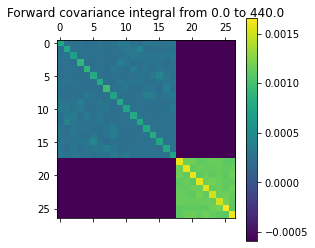

In [53]:
plt.matshow(I_forw.I_list[10])
plt.colorbar()
_ =  plt.title(f'Forward covariance integral from {I_forw.integral_time_grid[0]} to {I_forw.integral_time_grid[11]}')


In [54]:
# similarly, we can compute the backward covariance integral, by reversing time.
I_back = FlowIntegralClustering(T_inter_list=[T.toarray() for T in net.inter_T[lamda]], 
                                time_list=net.times,
                                integral_time_grid=integral_time_grid,
                                reverse_time=True,
                                verbose=True)

PID  67960  : computing T_list
PID  67960  : computing integral
PID  67960  :  0  over  20969  took 0.00s
PID  67960  :  1000  over  20969  took 0.02s
PID  67960  :  2000  over  20969  took 0.02s
PID  67960  :  3000  over  20969  took 0.03s
PID  67960  :  4000  over  20969  took 0.03s
PID  67960  :  5000  over  20969  took 0.03s
PID  67960  :  6000  over  20969  took 0.03s
PID  67960  :  7000  over  20969  took 0.02s
PID  67960  :  8000  over  20969  took 0.02s
PID  67960  :  9000  over  20969  took 0.02s
PID  67960  :  10000  over  20969  took 0.02s
PID  67960  :  11000  over  20969  took 0.02s
PID  67960  :  12000  over  20969  took 0.03s
PID  67960  :  13000  over  20969  took 0.03s
PID  67960  :  14000  over  20969  took 0.02s
PID  67960  :  15000  over  20969  took 0.02s
PID  67960  :  16000  over  20969  took 0.03s
PID  67960  :  17000  over  20969  took 0.02s
PID  67960  :  18000  over  20969  took 0.02s
PID  67960  :  19000  over  20969  took 0.03s
PID  67960  :  20000  over  2

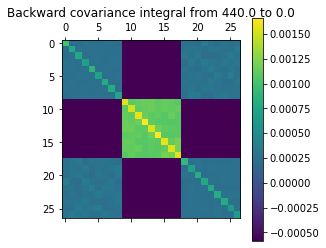

In [55]:
plt.matshow(I_back.I_list[10])
plt.colorbar()
_ = plt.title(f'Backward covariance integral from {I_back.integral_time_grid[0]} to {I_back.integral_time_grid[11]}')


## Optimizing the flow stability to find the best partition

In [56]:
# we can now find the partition optimizing the flow stability, 
# i.e. best clustering the covariance integral, with the Louvain algorithm
I_forw.find_louvain_clustering(k=10)

2

In [57]:
# the result is saved in 
I_forw.partition[10]
# and is a `Partition` object 

Partition with 27 nodes and 2 clusters.

In [58]:
# the cluster list is stored in 
I_forw.partition[10].cluster_list

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17},
 {18, 19, 20, 21, 22, 23, 24, 25, 26}]

In [43]:
# a dictionary mapping node ids to cluster ids is also availiable
I_forw.partition[10].node_to_cluster_dict

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1}

In [59]:
# Similarly for the backward flow stability
I_back.find_louvain_clustering(k=10)


2

In [60]:
I_back.partition[10].cluster_list

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 21, 22, 23, 24, 25, 26},
 {9, 10, 11, 12, 13, 14, 15, 16, 17}]